<a href="https://www.kaggle.com/code/asilbekjon/customer-churn?scriptVersionId=241454977" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binaryclassificationwithabankchurndataset/sample_submission.csv
/kaggle/input/binaryclassificationwithabankchurndataset/train.csv
/kaggle/input/binaryclassificationwithabankchurndataset/test.csv


Import 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

Dataset

In [3]:
df=pd.read_csv('/kaggle/input/binaryclassificationwithabankchurndataset/train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [4]:
test=pd.read_csv('/kaggle/input/binaryclassificationwithabankchurndataset/test.csv')
test.drop(["Surname",'CustomerId'],axis=1,inplace=True)

In [5]:
df.shape

(15000, 14)

In [6]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.579454e+07,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,4330.271354,1.268495e+07,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,0.000000,1.567151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563435e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,7499.500000,1.568947e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,11249.250000,1.575682e+07,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,14999.000000,1.569172e+09,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


Data Cleaning

In [8]:
##data cleaning
df.drop(['Surname','CustomerId'],axis=1,inplace=True)

#NaN values
df.isnull().sum()

id                 0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Visualization

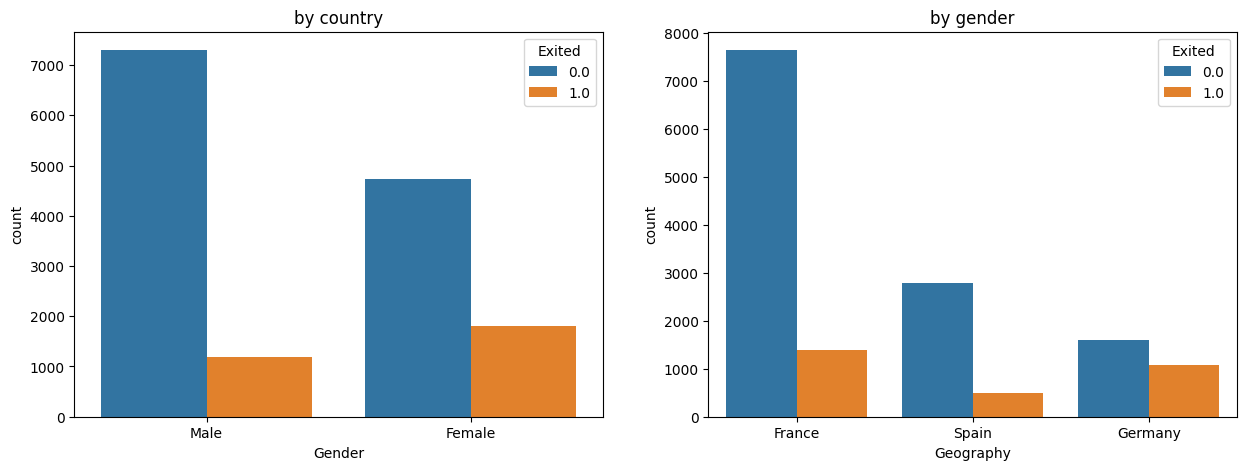

In [9]:
# categorical columns
fig, axes = plt.subplots(1,2 ,figsize=(15,5))

sns.countplot(x='Gender', hue='Exited', data=df, ax=axes[0])
axes[1].set_title("by gender")

sns.countplot(x='Geography', hue='Exited', data=df, ax=axes[1])
axes[0].set_title("by country")

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

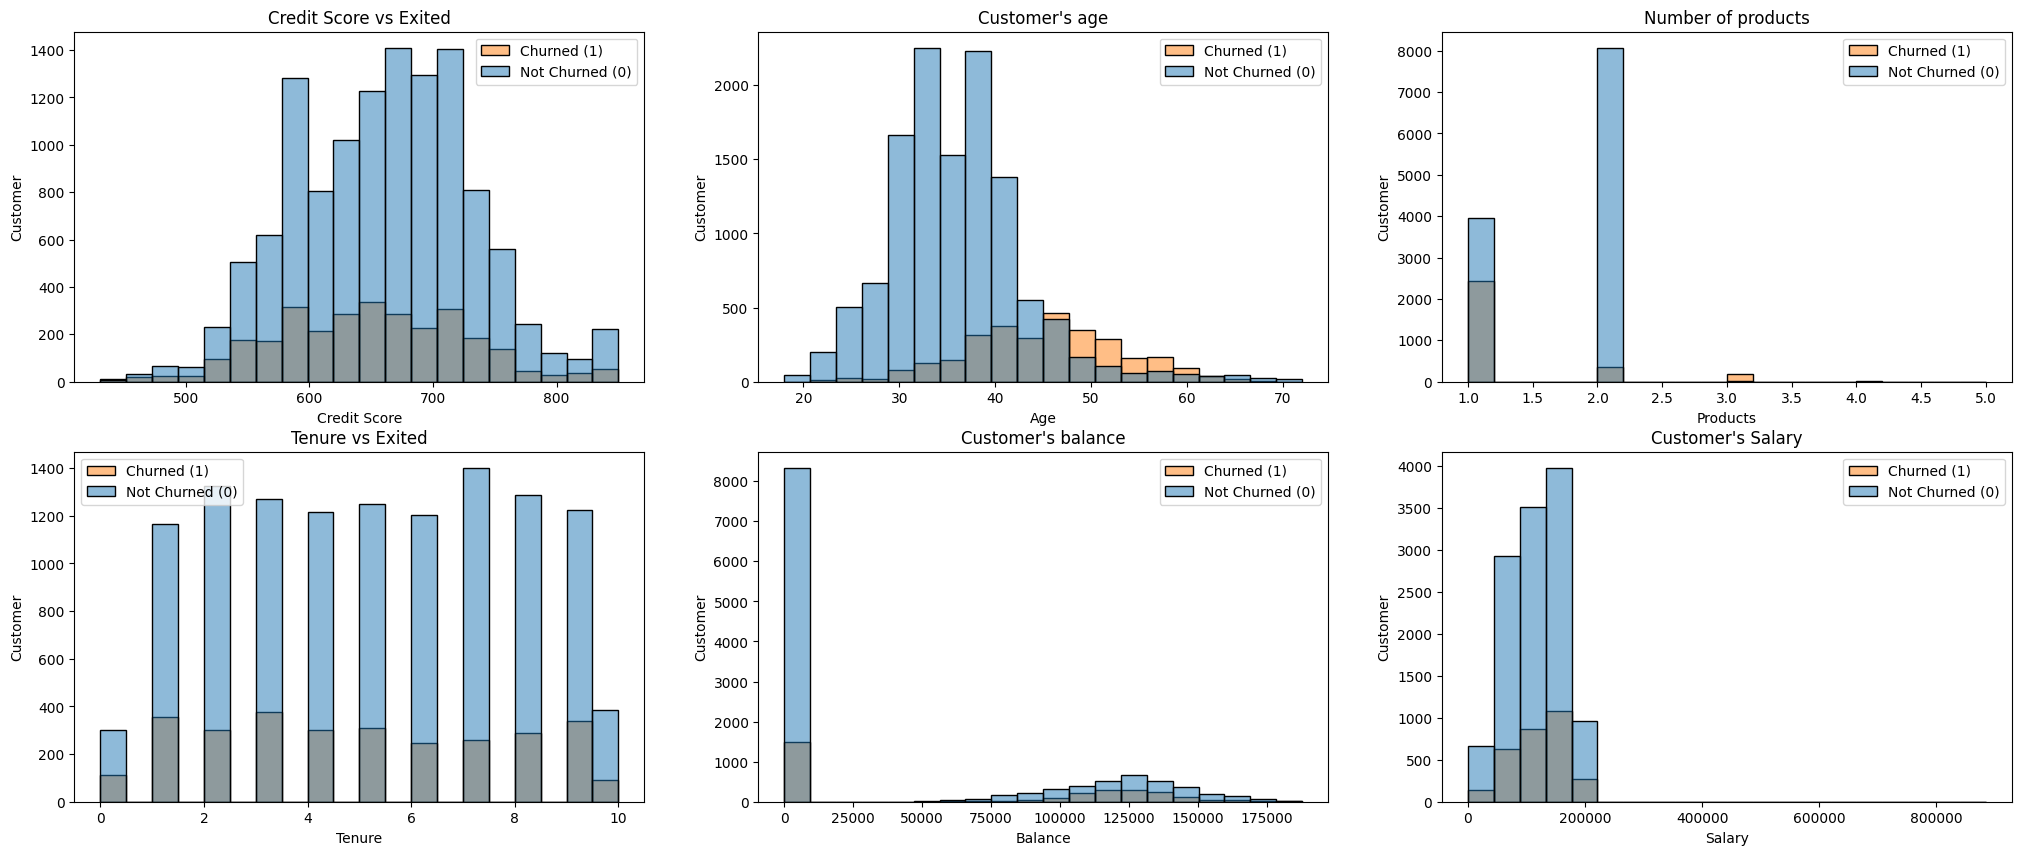

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))



#CreditScore vs Exited
sns.histplot(x="CreditScore", data=df, bins=20, hue="Exited", ax=axes[0, 0])
axes[0, 0].set_title("Credit Score vs Exited")
axes[0, 0].set_xlabel("Credit Score")
axes[0, 0].set_ylabel("Customer")
axes[0, 0].legend(labels=["Churned (1)", "Not Churned (0)"])

# Age vs Exited
sns.histplot(x="Age", data=df, bins=20, hue="Exited", ax=axes[0, 1])
axes[0, 1].set_title("Customer's age")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Customer")
axes[0, 1].legend(labels=["Churned (1)", "Not Churned (0)"])

#Tenure vs Exited
sns.histplot(x="Tenure", data=df, bins=20, hue="Exited", ax=axes[1, 0])
axes[1, 0].set_title("Tenure vs Exited")
axes[1, 0].set_xlabel("Tenure")
axes[1, 0].set_ylabel("Customer")
axes[1, 0].legend(labels=["Churned (1)", "Not Churned (0)"])

#Balance vs Exited
sns.histplot(x="Balance", data=df, bins=20, hue="Exited",  ax=axes[1, 1])
axes[1, 1].set_title("Customer's balance")
axes[1, 1].set_xlabel("Balance")
axes[1, 1].set_ylabel("Customer")
axes[1, 1].legend(labels=["Churned (1)", "Not Churned (0)"])

#Estimated Salary vs Exited
sns.histplot(x="EstimatedSalary", data=df, bins=20, hue="Exited",  ax=axes[1, 2])
axes[1, 2].set_title("Customer's Salary")
axes[1, 2].set_xlabel("Salary")
axes[1, 2].set_ylabel("Customer")
axes[1, 2].legend(labels=["Churned (1)", "Not Churned (0)"])

#Number of products vs Exited
sns.histplot(x="NumOfProducts", data=df, bins=20, hue="Exited",  ax=axes[0, 2])
axes[0, 2].set_title("Number of products")
axes[0, 2].set_xlabel("Products")
axes[0, 2].set_ylabel("Customer")
axes[0, 2].legend(labels=["Churned (1)", "Not Churned (0)"])


import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")
warnings.filterwarnings("ignore", category=FutureWarning, message=".*length-1 tuple.*")



In [11]:
df.corrwith(df['Exited'], numeric_only=True).abs().sort_values(ascending=False)

Exited             1.000000
Age                0.449425
NumOfProducts      0.312812
IsActiveMember     0.188748
Balance            0.160062
CreditScore        0.052375
EstimatedSalary    0.035193
Tenure             0.032897
id                 0.015533
HasCrCard          0.010670
dtype: float64

Preprocessing

In [12]:
labelEncoder=LabelEncoder() 
df['Geography']=labelEncoder.fit_transform(df.Geography.values) 
df.Geography.value_counts() 
df['Gender']=labelEncoder.fit_transform(df.Gender.values) 
df.Gender.value_counts() 
# 0=France # 1=Germany # 2=Spain 


Gender
1    8478
0    6522
Name: count, dtype: int64

In [13]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [14]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [15]:
# Standardizing

scaler = StandardScaler()
X_train_prepared= scaler.fit_transform(X_train)
X_test_prepared=scaler.transform(X_test)

In [16]:
# Desicion tree
tree_model= DecisionTreeClassifier(max_depth=7,min_samples_split=9,min_samples_leaf=2)
tree_model.fit(X_train_prepared, y_train)
y_pred = tree_model.predict(X_test_prepared)
print('Model accuracy:',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model accuracy: 0.8863333333333333
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2424
         1.0       0.72      0.67      0.69       576

    accuracy                           0.89      3000
   macro avg       0.82      0.80      0.81      3000
weighted avg       0.88      0.89      0.88      3000



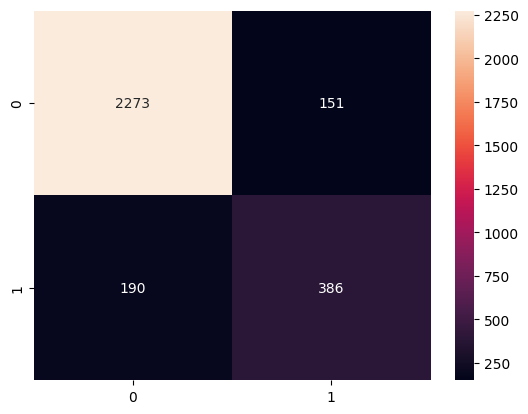

In [17]:
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,fmt='g')
plt.show()

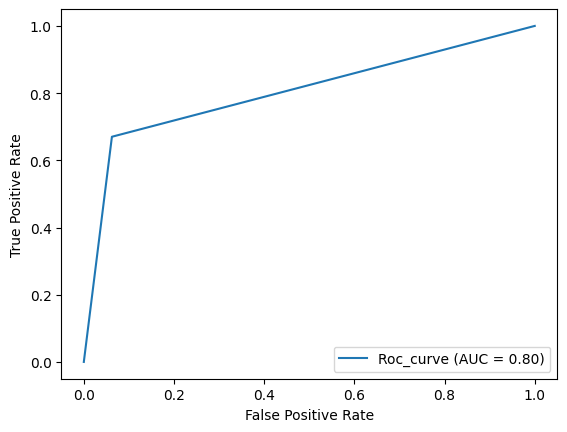

In [18]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Roc_curve')
display.plot()
plt.show()

In [19]:
GB=GradientBoostingClassifier()
GB.fit(X_train_prepared, y_train)
y_pred_1= GB.predict(X_test_prepared)
print('Model accuracy:',accuracy_score(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))

Model accuracy: 0.8993333333333333
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2424
         1.0       0.78      0.66      0.72       576

    accuracy                           0.90      3000
   macro avg       0.85      0.81      0.83      3000
weighted avg       0.90      0.90      0.90      3000



In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(GB, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_prepared, y_train)

best_GB = grid_search.best_estimator_
y_pred_best = best_GB.predict(X_test_prepared)

print("Best Parameters:", grid_search.best_params_)
print("Improved Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Improved Accuracy: 0.896
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2424
         1.0       0.76      0.66      0.71       576

    accuracy                           0.90      3000
   macro avg       0.84      0.81      0.82      3000
weighted avg       0.89      0.90      0.89      3000



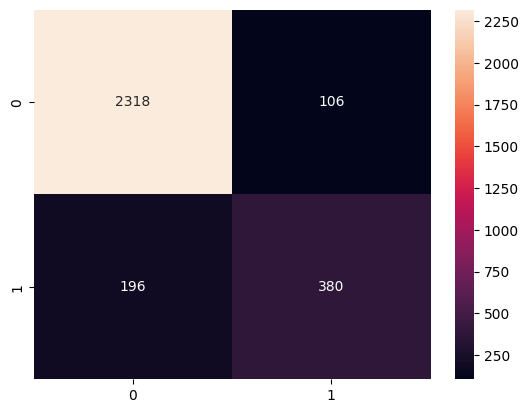

In [21]:
conf_mat=confusion_matrix(y_test,y_pred_1)
sns.heatmap(conf_mat,annot=True,fmt='g')
plt.show()

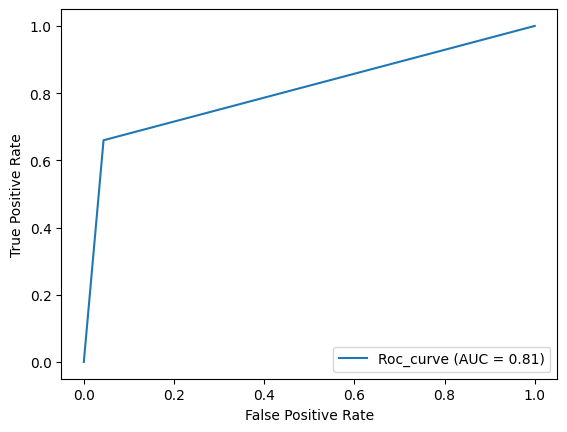

In [22]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_pred_1)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Roc_curve')
display.plot()
plt.show()

I tested Logistic, Random forest, Knn, Decision tree classifier, Gradient boosting but random forest gives best result with 89.9% accuracy

In [23]:
test_id=test.id

In [24]:
# 1=Male # 0=Female 
test['Geography']=labelEncoder.fit_transform(test.Geography.values) 
test['Gender']=labelEncoder.fit_transform(test.Gender.values)

In [25]:
test

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,707.0,1,1,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
1,15001,678.0,1,1,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
2,15002,636.0,2,1,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
3,15003,697.0,2,1,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
4,15004,553.0,2,1,31.0,2.0,0.00,2.0,1.0,0.0,58814.41
...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,583.0,0,0,46.0,4.0,0.00,2.0,1.0,1.0,175071.29
9996,24996,513.0,0,1,42.0,4.0,148159.71,2.0,1.0,1.0,149740.22
9997,24997,559.0,2,1,52.0,7.0,117561.49,3.0,1.0,0.0,163534.36
9998,24998,811.0,0,0,30.0,7.0,0.00,2.0,1.0,1.0,104786.59


In [26]:
#test predict
test_prepared=scaler.transform(test)
test_proba=GB.predict_proba(test_prepared)
test_positive_proba = test_proba[:, 1]  
submission = pd.DataFrame({'id': test_id, 'Exited': test_positive_proba})
submission.to_csv('submission.csv', index=False)

In [27]:
submission

,id,Exited
0,15000,0.087573
1,15001,0.135548
2,15002,0.042666
3,15003,0.137554
4,15004,0.018574
...,...,...
9995,24995,0.070435
9996,24996,0.113888
9997,24997,0.991307
9998,24998,0.009364


Submission

In [28]:
# Saving Model
import pickle

filename = 'RandomForestClassifair.pkl'
with open(filename, 'wb') as file:
    pickle.dump(tree_model, file)